# Generating images using Stable Diffusion
In this notebook we demonstrate how to use free models such as [Stable Diffusion 2](https://huggingface.co/stabilityai/stable-diffusion-2-1-base) from the [huggingface hub](https://huggingface.co/) to generate images. The example code shown here is modified from [this source](https://huggingface.co/docs/diffusers/api/models/autoencoder_tiny).

Before running this notebook, load the following modules from the "Softwares" panel on the left.
```
GCCore/11.3.0
Python/3.10.4
```

In [10]:
import torch
import numpy as np
from diffusers import DiffusionPipeline, AutoencoderTiny

All models from the Huggingface hub work similarily. A `pipe` is set up which can be executed later. When executing this code for the first time, multiple files will be downloaded, which are locally stored in a foolder `.cache/huggingface/hub/<model_name>`. These folders can become multiple gigabytes large and this may take some time. When executing the code again, the cached models will be used and the process will be much faster. 

In [3]:
pipe = DiffusionPipeline.from_pretrained(
    "/projects/p_scads_llm_secrets/models/stable-diffusion-2-1-base", torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

If a powerfull [CUDA](https://en.wikipedia.org/wiki/CUDA)-compatible graphics processing unit (GPU) is available, the executable `pipe` can be loaded on the GPU. In most cases, this is limited by available GPU memory. Only rare capabale models are executable on laptop GPUs.

In [4]:
pipe = pipe.to("cuda")

After the pipe has been set up, we can execute it like this:

  0%|          | 0/50 [00:00<?, ?it/s]

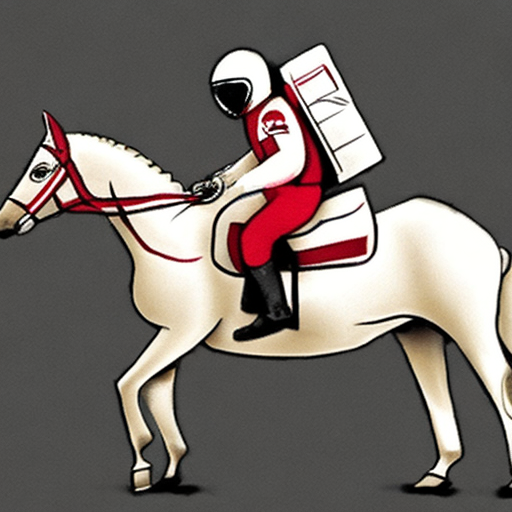

In [5]:
prompt = """
Draw a realistic photo of an astronaut riding a horse.
"""

astronaut = pipe(prompt).images[0]
astronaut

  0%|          | 0/50 [00:00<?, ?it/s]

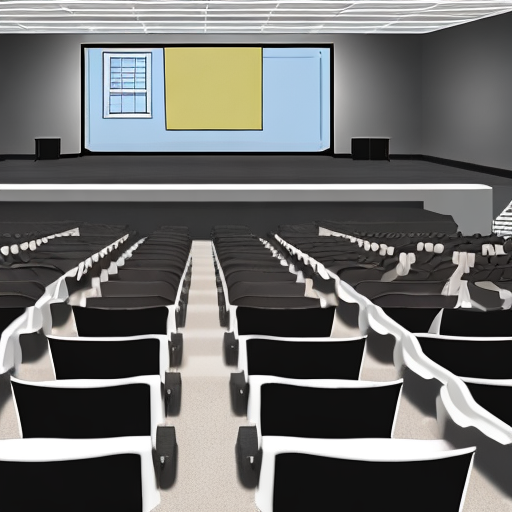

In [6]:
prompt = """
Draw a realistic photo of a lecture hall with an 
ongoing lecture about vision language models.
"""

photo = pipe(prompt).images[0]
photo

  0%|          | 0/50 [00:00<?, ?it/s]

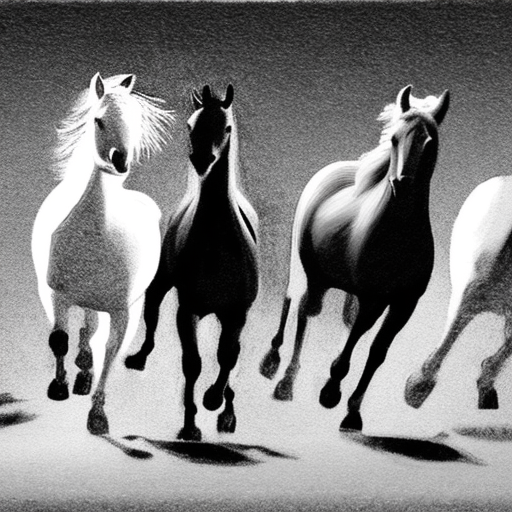

In [22]:
prompt = """
Draw a greyscale picture of sillhouettes sparse bright horses on dark background. 
Some of the horses are running, some are stationary.
"""

image = pipe(prompt).images[0]
image

Depending on the model / pipeline, we can specify additional parameters:

  0%|          | 0/10 [00:00<?, ?it/s]

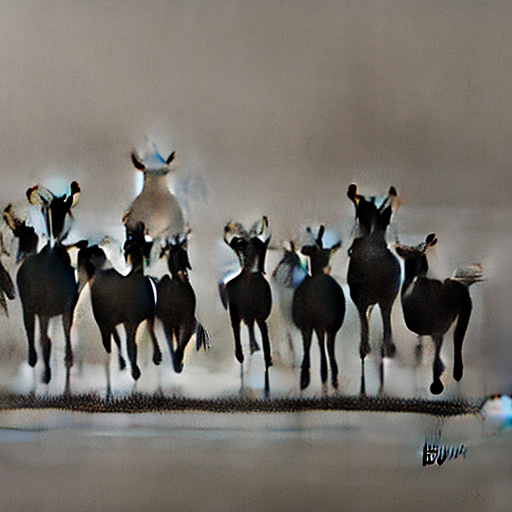

In [23]:
image = pipe(prompt, 
             num_inference_steps=10, 
             width=512, 
             height=512).images[0]
image

The image is a [pillow image](https://pillow.readthedocs.io/en/stable/reference/Image.html).

In [24]:
type(image)

PIL.Image.Image

It can be converted to numpy like this

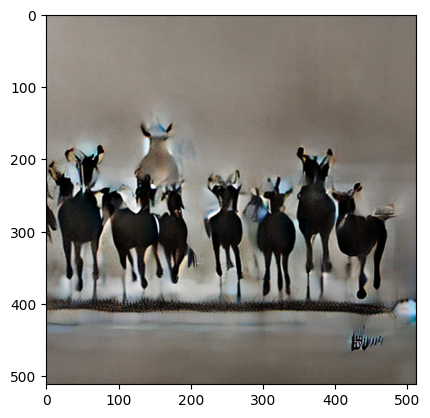

In [25]:
from matplotlib import pyplot as plt

image_np = np.array(image)
plt.imshow(image_np)

# Exercise
Use the `pipe()` function and prompt for another image, e.g. showing a cat sitting in front of a microscope.